In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('E:\Data Analysis\Classification-project\Dataset\diabetes.csv')
## for minimum 0 value in some important columns replace with mean or median of that 
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df[ 'SkinThickness']=df[ 'SkinThickness'].replace(0,df[ 'SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())



<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kanan\AppData\Local\Temp\ipykernel_18872\1101645850.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('E:\Data Analysis\Classification-project\Dataset\diabetes.csv')


<Axes: >

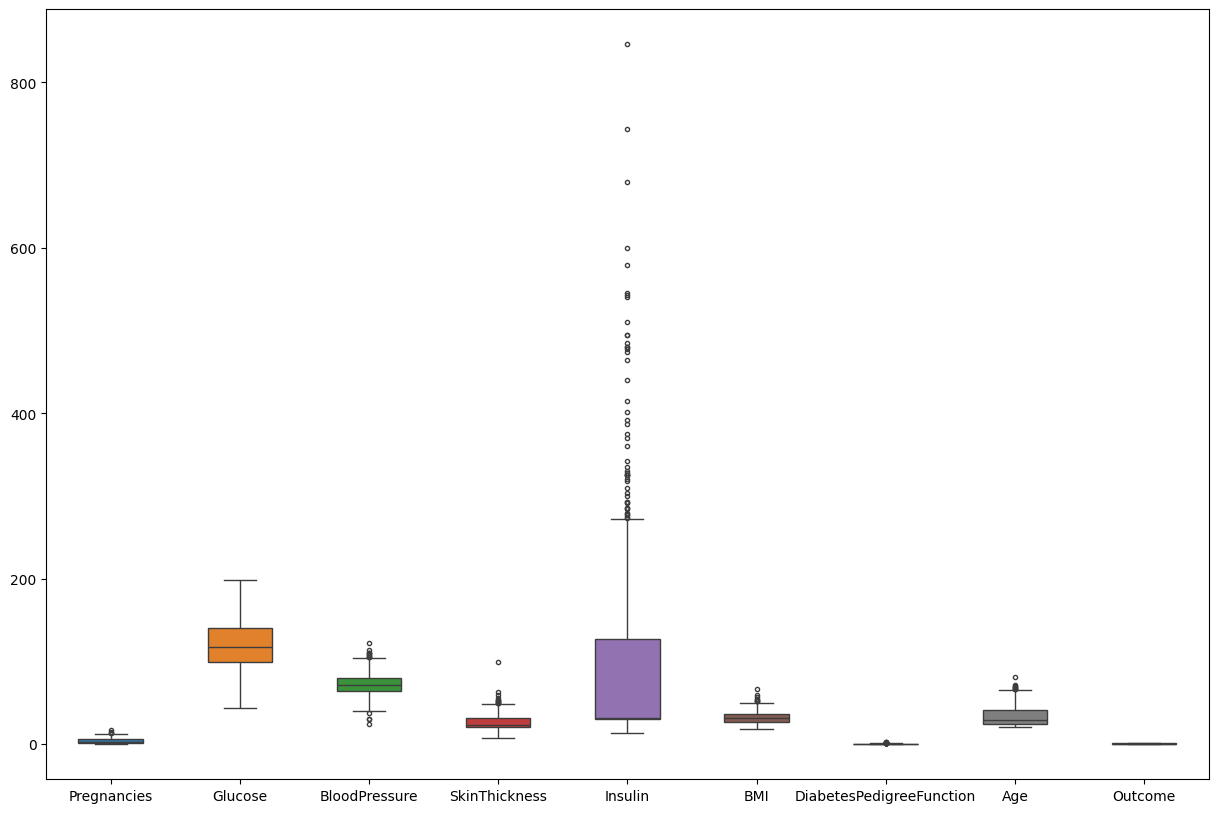

In [3]:
# visualize outlier with box plot
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [4]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)
X_train.shape,X_test.shape



((514, 8), (254, 8))

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
params = {
    'svc__kernel': ['rbf'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.01]
}
gs = GridSearchCV(pipe, params, n_jobs=-1, cv=3)
gs.fit(X_train, y_train)


,estimator,"Pipeline(step...svc', SVC())])"
,param_grid,"{'svc__C': [0.1, 1, ...], 'svc__gamma': ['scale', 0.01], 'svc__kernel': ['rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [6]:
y_pred1=gs.predict(X_test)

In [7]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("ACCURACY OF MODEL-->",accuracy_score(y_test,y_pred1))

[[144  24]
 [ 39  47]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       168
           1       0.66      0.55      0.60        86

    accuracy                           0.75       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.74      0.75      0.75       254

ACCURACY OF MODEL--> 0.7519685039370079


In [17]:
import pickle

file = open(r'E:\Data Analysis\Classification-project\models\ModelForPrediction.pkl', 'wb')
pickle.dump(gs.best_estimator_, file)
file.close()

In [8]:

svc=SVC()
parameters={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[1,10,0.1,100],
    'gamma':[1,0.1,0.01,0.001]
}
clf=GridSearchCV(SVC(),param_grid=parameters,cv=2,verbose=3)


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

param_dist = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 10, 0.1, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
rs = RandomizedSearchCV(SVC(), param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=3, random_state=0)
rs.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,SVC()
,param_distributions,"{'C': [1, 10, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,0
,error_score,nan


In [10]:
rs.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 1}

In [11]:
y_pred_KNN=rs.predict(X_test)

In [12]:
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))
print("ACCURACY OF MODEL-->",accuracy_score(y_test,y_pred_KNN))

[[140  28]
 [ 36  50]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       168
           1       0.64      0.58      0.61        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.75      0.74       254

ACCURACY OF MODEL--> 0.7480314960629921
